In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-and-emotion-analysis-dataset/archive/combined_emotion.csv
/kaggle/input/sentiment-and-emotion-analysis-dataset/archive/combined_sentiment_data.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/sentiment-and-emotion-analysis-dataset/archive/combined_emotion.csv')
df.head()

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sad
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughl...,fear


In [5]:
df.columns

Index(['sentence', 'emotion'], dtype='object')

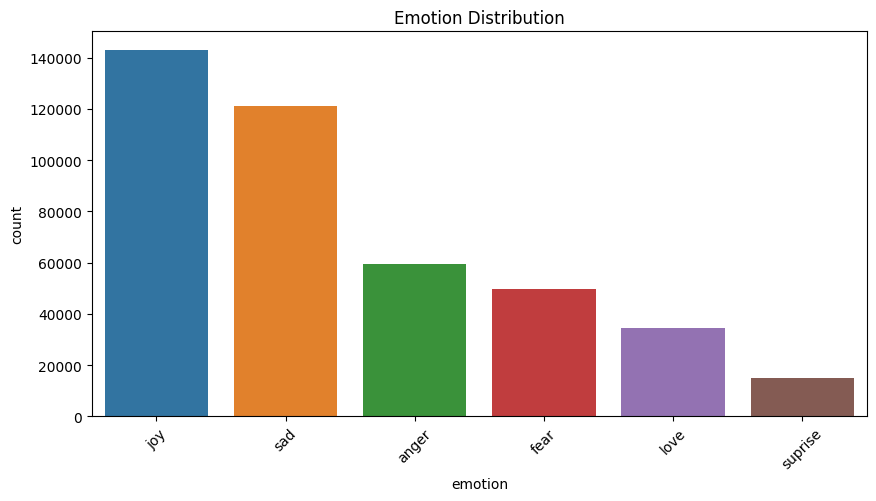

In [6]:
# Count of each emotion
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index)
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Split into train and test
from sklearn.model_selection import train_test_split
X = df['sentence']
y = df['emotion']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Convert text to numbers using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [10]:
# Use a simple but powerful model: Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# Predict and check accuracy
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8963453577764636
              precision    recall  f1-score   support

       anger       0.91      0.90      0.90     11810
        fear       0.85      0.85      0.85      9952
         joy       0.91      0.93      0.92     28781
        love       0.81      0.76      0.78      6929
         sad       0.94      0.93      0.93     24036
     suprise       0.77      0.71      0.74      3042

    accuracy                           0.90     84550
   macro avg       0.86      0.85      0.86     84550
weighted avg       0.90      0.90      0.90     84550

